In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
%matplotlib inline

## Spliting
Genrando la partición de la muestra de entranamiento y de evaluación

In [278]:
X_ini = np.random.choice(np.arange(0,50),size=(25000,250))

Añadiendo espacios vacios en la matriz X

In [279]:
mask = np.random.binomial(1,0.15,size=(25000,250))

In [280]:
X = X_ini*mask

In [281]:
Wt = np.random.normal(scale=0.3 , size=(250))

In [282]:
y = np.where(np.exp(X@Wt)>= 0.5, 1,0)

In [283]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,) #random_state=123)

In [284]:
X_train.shape

(20000, 250)

In [285]:
X_test.shape

(5000, 250)

# Realizando la segmentación TF-IDF
Podemos observar la matriz de TF con la matriz de conteo de frecuencias absolutas 

In [286]:
X

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0, 39, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

realizando la normalización de orden p

In [287]:
def Norm(X):
    Sum_x = X.cumsum(axis=1)[:,-1]
    norm =[]
    for row in X:
        if sum(row) >0:
            norm.append(row/sum(row))
    return np.array(norm)

In [288]:
X_trainN = Norm(X_train)

Definiendo la funcion df para obtemer el número de documentos que tienen al atributo t 


In [289]:
def df(X):
    nd_df =  (X>0).cumsum(axis=0)[-1] /X.shape[0]
    return np.log(nd_df+1)  

In [290]:
idf_t = df(X_train) # Guardando los IDF de cada token 

In [299]:
idf_t.shape

(250,)

Hallando el TF-IDF 
$$TF - IDF(t,d) = tf(t,d)\ x\ idf(t) $$

In [292]:
X_t_tf_idf = (X_trainN*idf_t)

In [293]:
X_t_tf_idf

array([[0.00089755, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0086412 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00311487],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00328126],
       [0.00130314, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Definiendo la arquitectura de la red neuronal

In [223]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [224]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.0 ,nesterov=True)
rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad =  keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

In [225]:
model = Sequential()

model.add(Dense(251, activation='tanh', input_shape=(250,)))

model.add(Dense(500, activation='linear'))

model.add(Dense(25, activation='softmax'))

model.add(Dense(1, activation='sigmoid'))

In [226]:
# Model output shape
model.output_shape

(None, 1)

In [227]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 251)               63001     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               126000    
_________________________________________________________________
dense_3 (Dense)              (None, 25)                12525     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 201,552
Trainable params: 201,552
Non-trainable params: 0
_________________________________________________________________


In [228]:
# Model config
# model.get_config()

In [229]:
# List all weight tensors 
# model.get_weights()

## Entrenando la RED

In [230]:
from keras.callbacks import History 
history = History()

In [231]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [232]:
model.fit(X_train, y_train,epochs=10, batch_size=1000, verbose=1,callbacks=[history],)

Epoch 1/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.6043 - acc: 0.7459
Epoch 2/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.5299 - acc: 0.8865
Epoch 3/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.4909 - acc: 0.9389
Epoch 4/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.4727 - acc: 0.9549
Epoch 5/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.4503 - acc: 0.9792
Epoch 6/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.4406 - acc: 0.9796
Epoch 7/10
20000/20000 [==============================] - 0s 12us/step - loss: 0.4253 - acc: 0.9900
Epoch 8/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.4228 - acc: 0.9798
Epoch 9/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.4052 - acc: 0.9946
Epoch 10/10
20000/20000 [==============================] - 0s 13us/step - loss: 0.3957 - acc: 0.9960

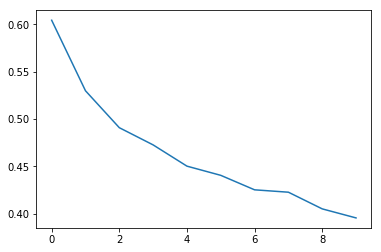

In [233]:
plt.plot(history.history["loss"])

In [234]:
y_train[:5]

array([0, 0, 0, 0, 0])

## Generando las predicciones

In [235]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[0],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

In [22]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 98us/step
[0.4421419809818268, 0.963]


## Evaluando el modelo 

In [237]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[3463,  145],
       [ 198, 1194]])

In [238]:
precision_score(y_test, y_pred)

0.8917102315160568

In [239]:
recall_score(y_test, y_pred)

0.8577586206896551

In [240]:
f1_score(y_test,y_pred)

0.8744049798608569

In [241]:
cohen_kappa_score(y_test, y_pred)

0.8272427417775604

# Guardando los pesos

In [242]:
#model.save("models/Modelo 1")

In [243]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 22us/step
[0.4312249164581299, 0.9314]


In [244]:
model.load_weights("models/Modelo 1")

In [245]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 18us/step
[1.1739925958633424, 0.5504]
